In [3]:
import os

import pandas
import numpy

import seaborn
from matplotlib import pyplot as plt

In [5]:

def load_data(path):

    dfs = []
    for filename in os.listdir(path):
        p = os.path.join(path, filename)
        df = pandas.read_csv(p)
        df['file'] = filename
        dfs.append(df)
    
    out = pandas.concat(dfs)
    out = out.set_index(['file', 'time'])
    return out
    
path = 'examples/sequence/data/first-host/'
data = load_data(path)

data

event     delta
file                time                      
sequence-host-4.csv 2546.929   event   546.781
                    2979.237   event   432.308
                    3314.613   event   335.376
                    3427.280   event   112.667
                    3874.947   event   447.667
...                              ...       ...
sequence-host-3.csv 27276.404  event   192.389
                    28588.703  event  1312.299
                    29476.349  event   887.646
                    29676.673  event   200.324
                    29860.902  event   184.229

[194 rows x 2 columns]

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


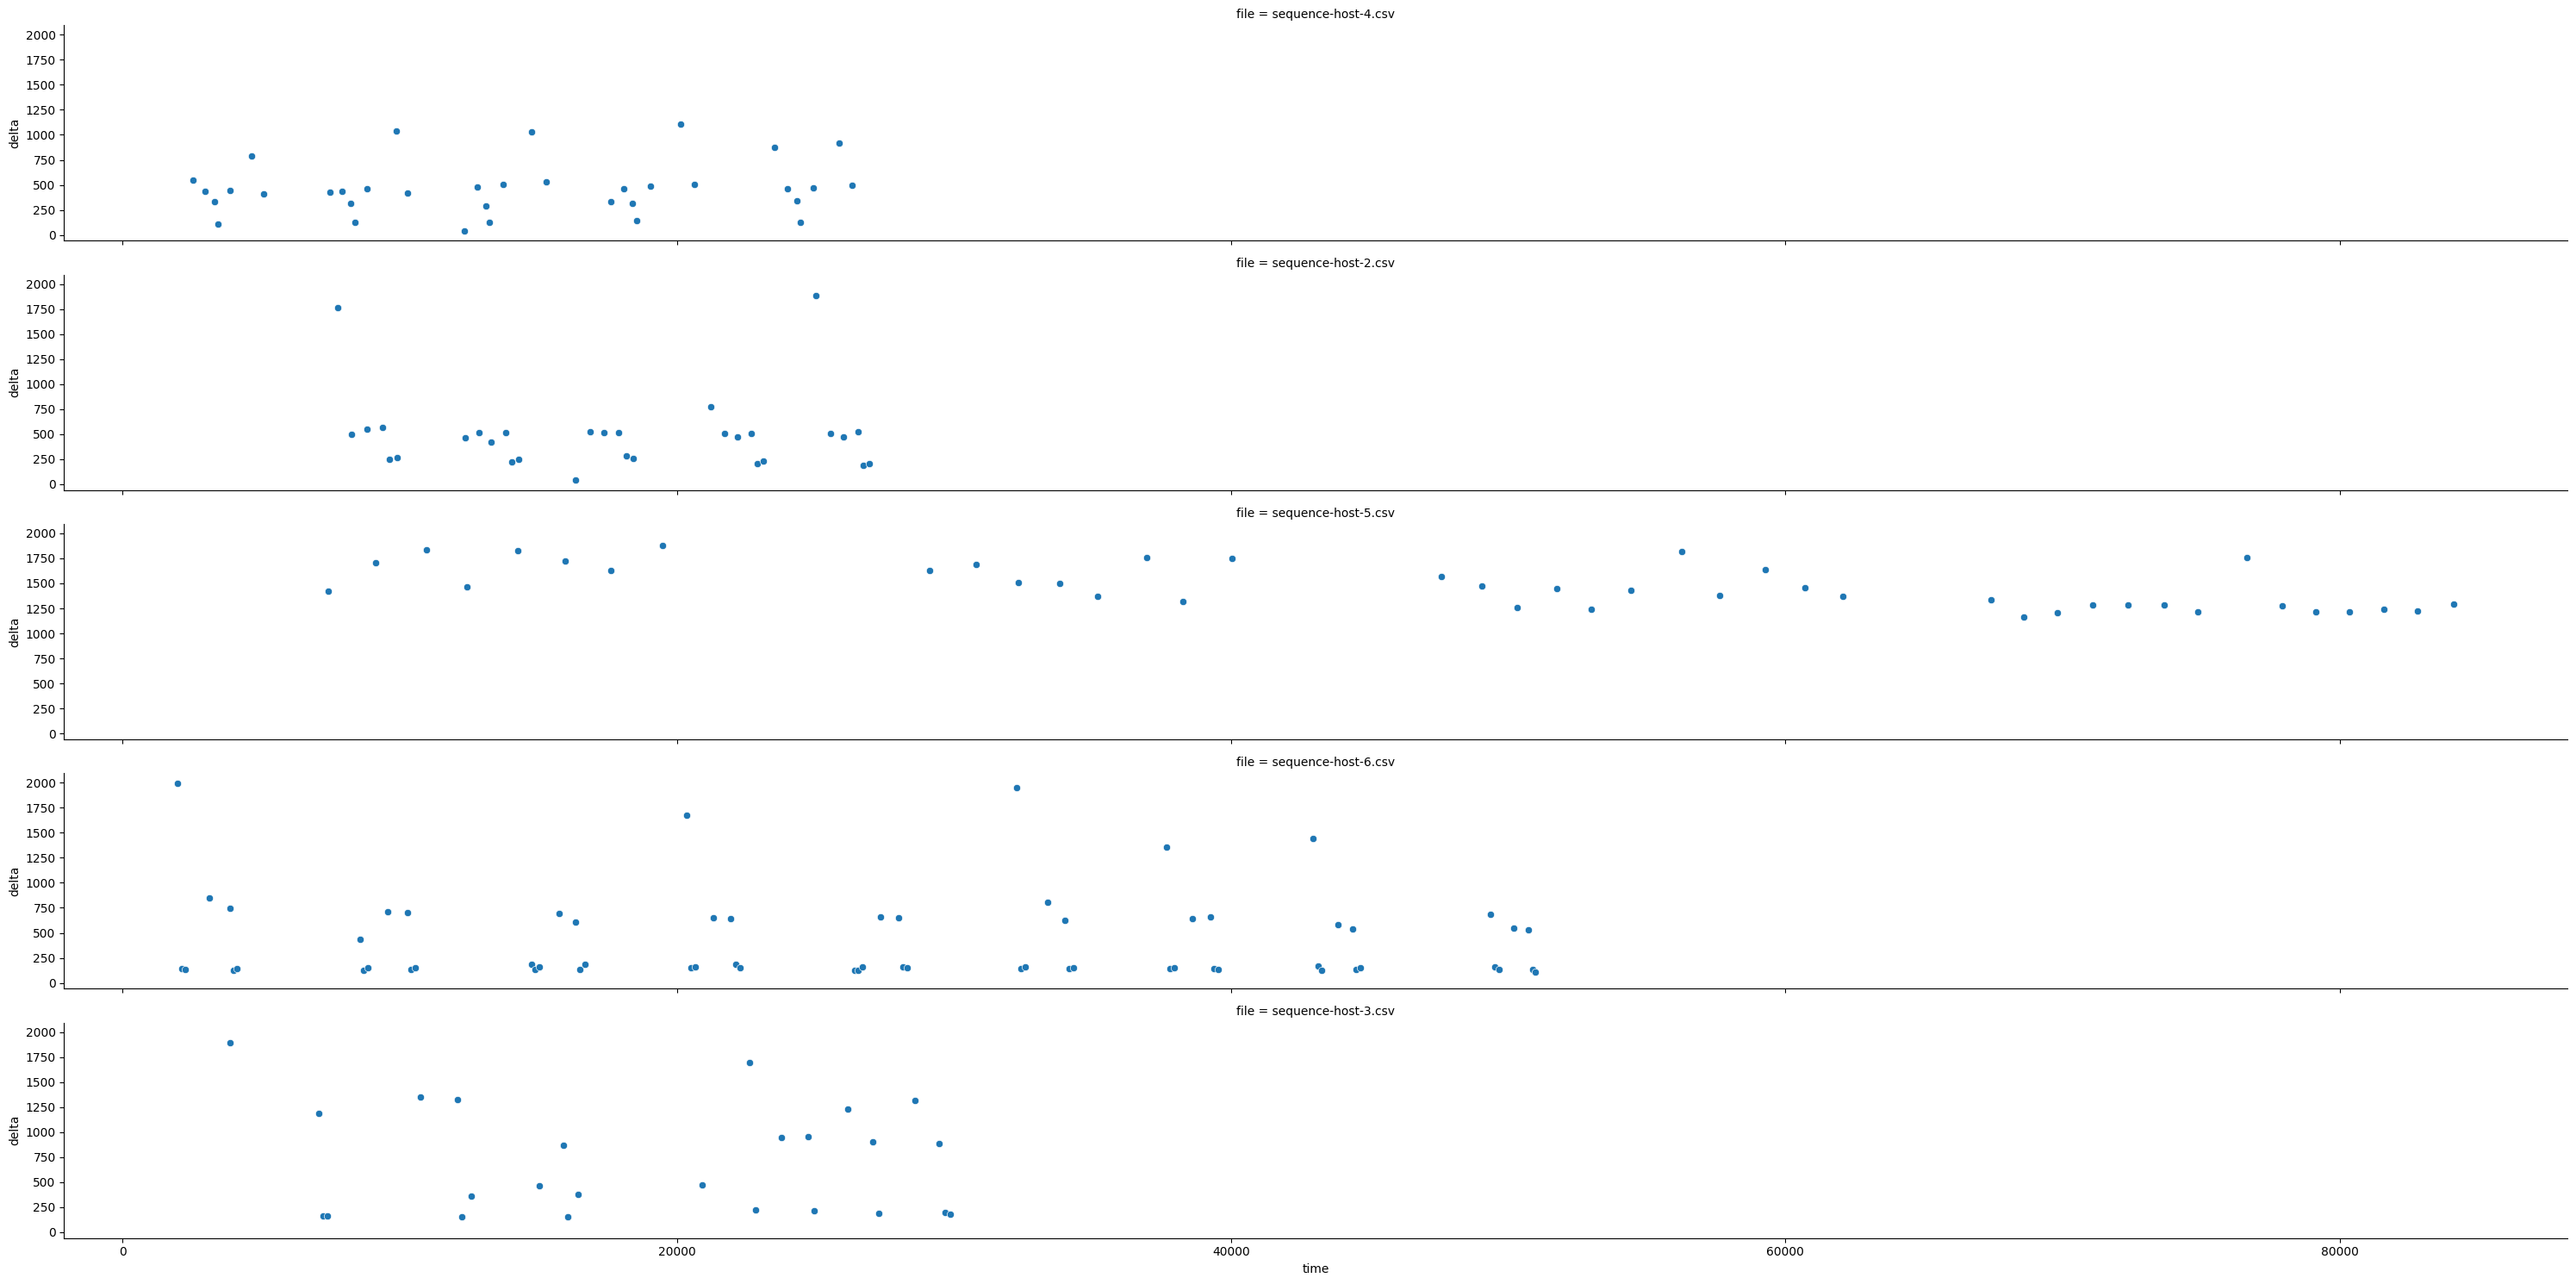

In [7]:
seaborn.relplot(data=data.reset_index(), x='time', row='file', y='delta', aspect=10, height=3)

In [8]:

data


event     delta
file                time                      
sequence-host-4.csv 2546.929   event   546.781
                    2979.237   event   432.308
                    3314.613   event   335.376
                    3427.280   event   112.667
                    3874.947   event   447.667
...                              ...       ...
sequence-host-3.csv 27276.404  event   192.389
                    28588.703  event  1312.299
                    29476.349  event   887.646
                    29676.673  event   200.324
                    29860.902  event   184.229

[194 rows x 2 columns]

In [33]:

class Windower():
    def __init__(self, length=5, stride=1):
        self.buffer = []
        self.length = length
        assert stride == 1

    def push(self, sample):

        if len(self.buffer) == self.length:
            self.buffer = self.buffer[1:]
        
        self.buffer.append(sample)

    def full(self):
        return len(self.buffer) == self.length

win = Windower()

def extract_windows(series):

    #print(series)
    
    for t, delta in series.items():
        win.push(delta)

        if win.full():
            yield numpy.array(win.buffer)
        
g = data.loc['sequence-host-4.csv']
windows = list(extract_windows(g['delta']))
train = numpy.stack([windows[1]])

train

    


array([[432.308, 335.376, 112.667, 447.667, 791.837]])

In [34]:
from sklearn.neighbors import KNeighborsClassifier

est = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
est.fit(train, y=[1])


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

<Axes: >

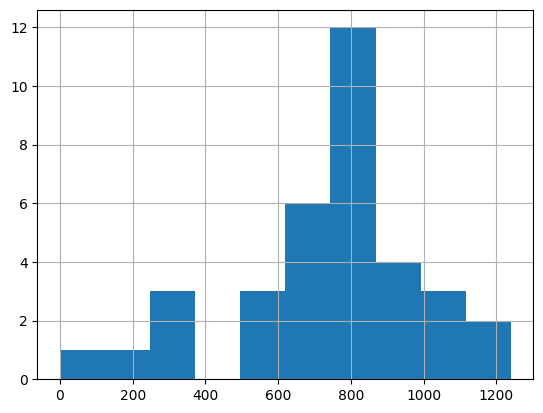

In [48]:

def compute_distance(data):

    windows = list(extract_windows(data['delta']))
    dist, _ = est.kneighbors(windows)
    return dist[:,0]

pandas.Series(compute_distance(data.loc['sequence-host-4.csv'])).hist()

<Axes: >

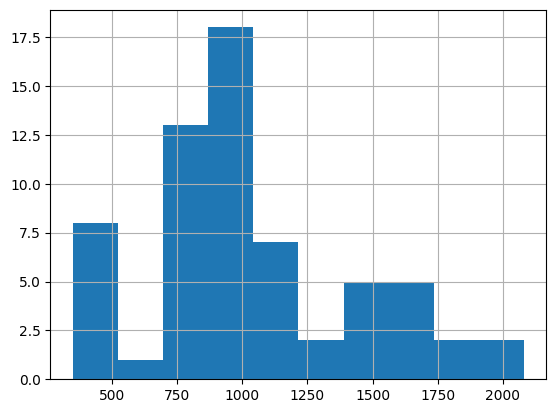

In [49]:
pandas.Series(compute_distance(data.loc['sequence-host-6.csv'])).hist()